In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
import scipy.stats as stat
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ashis\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("C:/Users/ashis/OneDrive/Desktop/Churn_Modelling  model.csv")
df

,Cust_id,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of accounts,Cr Card,active member,monthly Salary,Exited
0,1,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [3]:
independent_vars = [ 'Gender', 'Geography', 'active member', 'Cr Card']
target_var = 'Exited'


for var in independent_vars:
    contingency_table = pd.crosstab(df[var], df[target_var]) 
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  
    
    print(f"\nChi-Square Test for {var}:")
    print(f"Chi-Square Statistic: {chi2:}")
    print(f"p-value: {p:}")
   


Chi-Square Test for Gender:
Chi-Square Statistic: 112.91857062096116
p-value: 2.2482100097131755e-26

Chi-Square Test for Geography:
Chi-Square Statistic: 301.25533682434536
p-value: 3.8303176053541544e-66

Chi-Square Test for active member:
Chi-Square Statistic: 243.3038999239534
p-value: 7.48734658958622e-55

Chi-Square Test for Cr Card:
Chi-Square Statistic: 0.47133779904440803
p-value: 0.49237236141554686


In [4]:
from scipy.stats import chi2_contingency
import numpy as np

categorical_vars = ["Gender", "Geography", "active member", "Cr Card"]
cramer_v_results = {}

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df["Exited"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    k, r = contingency_table.shape
    cramers_v = np.sqrt(chi2 / (n * min(k - 1, r - 1)))
    
    cramer_v_results[var] = {"Chi2": chi2, "p-value": p, "Cramér's V": cramers_v}

cramer_v_results

{'Gender': {'Chi2': 112.91857062096116,
  'p-value': 2.2482100097131755e-26,
  "Cramér's V": 0.10626315006669113},
 'Geography': {'Chi2': 301.25533682434536,
  'p-value': 3.8303176053541544e-66,
  "Cramér's V": 0.17356708697916934},
 'active member': {'Chi2': 243.3038999239534,
  'p-value': 7.48734658958622e-55,
  "Cramér's V": 0.15598201817002927},
 'Cr Card': {'Chi2': 0.47133779904440803,
  'p-value': 0.49237236141554686,
  "Cramér's V": 0.006865404569611379}}

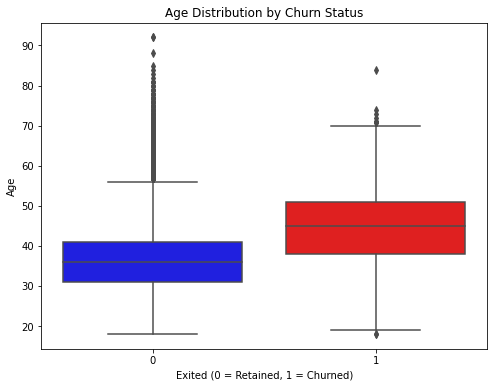

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt  # Required for plotting

# Create a box plot for Age distribution by churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="Age", data=df, palette={0: "blue", 1: "red"})

# Labels and title
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("Age")
plt.title("Age Distribution by Churn Status")

plt.show()  # Display the plot


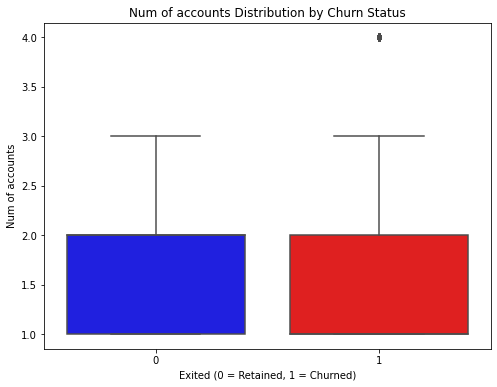

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt  # Required for plotting

# Create a box plot for Age distribution by churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="Num Of accounts", data=df, palette={0: "blue", 1: "red"})

# Labels and title
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("Num of accounts")
plt.title("Num of accounts Distribution by Churn Status")

plt.show()  # Display the plot


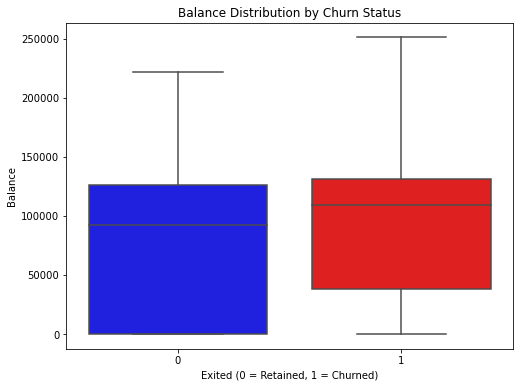

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt  # Required for plotting

# Create a box plot for Age distribution by churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="Balance", data=df, palette={0: "blue", 1: "red"})

# Labels and title
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("Balance")
plt.title("Balance Distribution by Churn Status")

plt.show()  # Display the plot


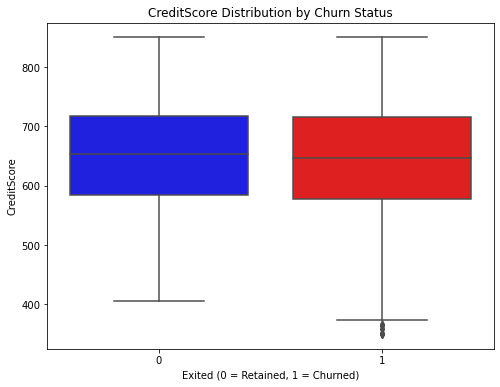

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt  # Required for plotting

# Create a box plot for Age distribution by churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="CreditScore", data=df, palette={0: "blue", 1: "red"})

# Labels and title
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("CreditScore")
plt.title("CreditScore Distribution by Churn Status")

plt.show()  # Display the plot


In [41]:
# Create a contingency table
contingency_table = pd.crosstab(df['active member'], df['Exited'])
contingency_table

Exited,0,1
active member,,
0,3546,1302
1,4417,735


In [42]:
# Create a contingency table
contingency_table = pd.crosstab(df['Geography'], df['Exited'])
contingency_table

Exited,0,1
Geography,,
1,4204,810
2,2064,413
3,1695,814


In [43]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Exited'])
contingency_table

Exited,0,1
Gender,,
0,3404,1139
1,4559,898


In [44]:
# Create a contingency table
contingency_table = pd.crosstab(df['Cr Card'], df['Exited'])
contingency_table

Exited,0,1
Cr Card,,
0,2332,613
1,5631,1424


In [5]:
dependent_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of accounts', 'monthly Salary']
target_var = 'Exited'
results = {}
for var in dependent_vars:
    group_0 = df[df[target_var] == 0][var]  
    group_1 = df[df[target_var] == 1][var]  

    stat, p_value = mannwhitneyu(group_0, group_1)
    results[var] = {'U-statistic': stat, 'p-value': p_value}
for var, res in results.items():
    print(f"Variable: {var}")
    print(f"U-statistic: {res['U-statistic']}")
    print(f"p-value: {res['p-value']}")
    print()

Variable: CreditScore
U-statistic: 8381083.0
p-value: 0.01986866117272834

Variable: Age
U-statistic: 4345981.5
p-value: 3.2104014319371675e-230

Variable: Tenure
U-statistic: 8272055.5
p-value: 0.16219376122918827

Variable: Balance
U-statistic: 6849444.5
p-value: 1.1158399379149222e-28

Variable: Num Of accounts
U-statistic: 9390005.5
p-value: 5.275105212817194e-36

Variable: monthly Salary
U-statistic: 7969863.0
p-value: 0.22705150930153783



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

X = df[['Age', 'Geography', 'Gender', 'Balance', 'Num Of accounts', 'active member']]
y = df['Exited'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=500, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_lr)


classification_rep_lr = classification_report(y_test, y_pred_lr)
print(f"Logistic Regression Classification Report:\n{classification_rep_lr}")
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.62      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1547   46]
 [ 333   74]]


# Neural Network(MLP)

In [21]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

classification_rep_mlp = classification_report(y_test, y_pred_mlp)
print(f"MLPClassifier Classification Report:\n{classification_rep_mlp}")
print("Confusion Matrix:\n", conf_matrix)

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.50      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix:
 [[1534   59]
 [ 202  205]]


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, rf_predictions)

rf_report = classification_report(y_test, rf_predictions)
print("\nRandom Forest Classification Report:\n", rf_report)
print("Confusion Matrix:\n", conf_matrix)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1593
           1       0.63      0.50      0.55       407

    accuracy                           0.84      2000
   macro avg       0.75      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000

Confusion Matrix:
 [[1473  120]
 [ 205  202]]


In [51]:
print("\nModel Hyperparameters:")
params = rf_model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

num_trees = len(rf_model.estimators_)
print(f"\nNumber of trees in the forest: {num_trees}")

feature_names = list(X.columns) 
print("\nFeature Importances:")
for feature, importance in zip(feature_names, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Model Hyperparameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False

Number of trees in the forest: 100

Feature Importances:
Age: 0.3494
Geography: 0.0488
Gender: 0.0204
Balance: 0.3829
Num Of accounts: 0.1499
active member: 0.0486


In [23]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_predNB = model_NB.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_predNB)

classification_rep = classification_report(y_test, y_predNB)
print(f"Naive Bayes Classification Report:\n{classification_rep}")
print("Confusion Matrix:\n", conf_matrix)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.69      0.29      0.41       407

    accuracy                           0.83      2000
   macro avg       0.77      0.63      0.65      2000
weighted avg       0.81      0.83      0.80      2000

Confusion Matrix:
 [[1541   52]
 [ 289  118]]


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

kernels = ['linear', 'rbf']

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    
    svm_model = SVC(kernel=kernel, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nClassification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)


Training SVM with linear kernel...
Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000

Confusion Matrix:
 [[1593    0]
 [ 407    0]]

Training SVM with rbf kernel...


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.38      0.52       407

    accuracy                           0.86      2000
   macro avg       0.85      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000

Confusion Matrix:
 [[1564   29]
 [ 253  154]]


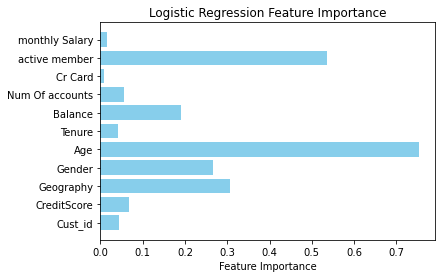

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load data
#df = pd.read_csv("/mnt/data/Churn prediction  modeling.csv").drop(columns=["CustID"])

# Convert text data to numbers
for col in ["Geography", "Gender", "active member", "Exited"]:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split into features (X) and target (y)
X, y = df.drop(columns=["Exited"]), df["Exited"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Show feature importance
plt.barh(X.columns, abs(model.coef_[0]), color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Logistic Regression Feature Importance")
plt.show()
